# Use UMAP layout

In [1]:
from gensim.models import KeyedVectors

wv = KeyedVectors.load('periodical-clustering/data/2010s/Word2Vec/wv')

In [2]:
import umap
import pandas as pd

# 1. 获取所有词和对应向量
VIDs = wv.index_to_key
vectors = wv.vectors     # shape: (num_words, dim)

# 2. UMAP降维到2D
umap_model = umap.UMAP(n_components=2)
embedding_2d = umap_model.fit_transform(vectors)  # shape: (num_words, 2)

# 3. 放到DataFrame
df_umap = pd.DataFrame({
    'name': VIDs,
    'x': embedding_2d[:, 0],
    'y': embedding_2d[:, 1]
})
df_umap

,name,x,y
0,2.023817e+08,6.825838,7.709064
1,1.377736e+08,6.548576,7.452534
2,1.257544e+08,6.661515,7.482069
3,3.880285e+06,6.544640,7.419918
4,1.111554e+08,3.154057,5.304965
...,...,...,...
37589,2.764535e+09,1.598670,6.046755
37590,2.737185e+09,-2.212079,14.613791
37591,2.756162e+09,12.626633,12.478555
37592,2.737688e+09,-1.505796,13.041963


In [3]:
node_df = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/node.csv')
node_df = node_df.merge(df_umap, on='name').rename(columns={0: 'x', 1: 'y'})
node_df['kmeans_label'] = node_df['kmeans_label'].astype('category')
node_df

,name,kmeans_label,self_citations,outer_citations,total_cited,total_references,self_cite_pct,x,y
0,202381698,17,247889,4693463,4941352,4080795,0.050166,7.017823,10.742559
1,137773608,17,33004,2625459,2658463,276992,0.012415,6.849580,10.846975
2,125754415,17,63700,2527268,2590968,834443,0.024585,6.868404,10.876798
3,3880285,8,24046,2189773,2213819,255821,0.010862,6.851147,10.836654
4,111155417,11,129824,2096261,2226085,728068,0.058319,2.087981,5.554878
...,...,...,...,...,...,...,...,...,...
20033,2764485818,18,0,28,28,13,0.000000,8.615145,9.170639
20034,83454320,13,0,22,22,0,0.000000,-2.477505,14.525292
20035,16507453,13,0,21,21,1,0.000000,-1.565880,14.735690
20036,121509672,21,0,14,14,0,0.000000,4.734893,11.104467


# Use NeuLay

In [ ]:
import pandas as pd

node_df = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/node.csv')
layout = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/neulay_results/GATConv_2d/fdl_iter_00501.csv',
                header=None)

In [28]:
node_df = pd.concat([node_df, layout], axis=1).rename(columns={0: 'x', 1: 'y'})
node_df['kmeans_label'] = node_df['kmeans_label'].astype('category')
node_df

,name,kmeans_label,self_citations,outer_citations,total_cited,total_references,self_cite_pct,x,y
0,202381698,17,247889,4693463,4941352,4080795,0.050166,2.456751,-8.349404
1,137773608,17,33004,2625459,2658463,276992,0.012415,2.850538,-8.101215
2,125754415,17,63700,2527268,2590968,834443,0.024585,2.728850,-8.102651
3,3880285,8,24046,2189773,2213819,255821,0.010862,2.938426,-7.943606
4,111155417,11,129824,2096261,2226085,728068,0.058319,3.441973,-7.915849
...,...,...,...,...,...,...,...,...,...
20033,2764485818,18,0,28,28,13,0.000000,0.196297,-14.864861
20034,83454320,13,0,22,22,0,0.000000,-7.724393,-1.252659
20035,16507453,13,0,21,21,1,0.000000,-7.327792,-9.457097
20036,121509672,21,0,14,14,0,0.000000,2.999937,-15.689074


# Load edge

In [4]:
edge_df = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/edge.csv')

name_to_idx = {name: idx for idx, name in node_df['name'].to_dict().items()}
edge_df['source'] = edge_df['source'].map(name_to_idx)
edge_df['target'] = edge_df['target'].map(name_to_idx)
edge_df

,source,target,weight
0,4281,4281,1307
1,4281,58,1
2,4281,6565,10
3,4281,2394,1
4,4281,4970,1
...,...,...,...
19151974,19618,10414,1
19151975,19618,1286,1
19151976,19618,4717,1
19151977,19618,6083,1


In [5]:
from datashader.layout import forceatlas2_layout

%time fa2 = forceatlas2_layout(node_df, edge_df)

CPU times: user 2min 5s, sys: 3.08 s, total: 2min 8s
Wall time: 44.5 s


In [6]:
cluster2color = {0: '#8FA329', 1: '#D26B04', 2: '#FF5C29', 3: '#A679FF', 4: '#0099FF',
                 5: '#FF7C80', 6: '#FFCC00', 7: '#7030A0', 8: '#000099', 9: '#92D050',
                 10: '#FC9320', 11: '#9A0000', 12: '#FE0000', 13: '#375623', 14: '#D20000',
                 15: '#FBFF57', 16: '#CC00FF', 17: '#336699', 18: '#85D6FF', 19: '#6C0000',
                 20: '#9900CC', 21: '#0000F2', 22: '#CCB3FF', 23: '#16A90F', 24: '#187402', 
                 25: '#66FF66'}

cvsopts = dict(plot_height=400, plot_width=400)

Original,ForceAtlas2

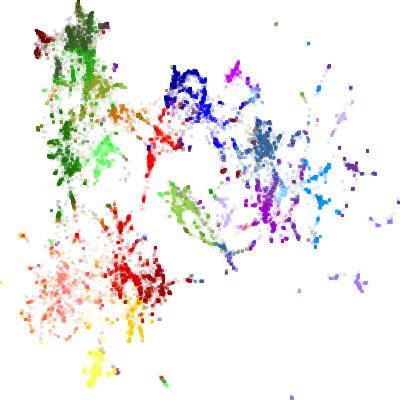
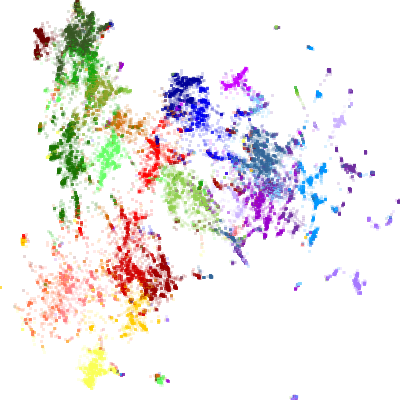

In [7]:
import datashader as ds
import datashader.transfer_functions as tf

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, color_key=cluster2color), px=1, name=name)

tf.Images(nodesplot(node_df, "Original", cat="kmeans_label"), nodesplot(fa2,"ForceAtlas2", cat="kmeans_label"))

In [8]:
from datashader.bundling import connect_edges, hammer_bundle

In [9]:
%time o_edges = connect_edges(node_df, edge_df)

CPU times: user 38.1 s, sys: 9.73 s, total: 47.8 s
Wall time: 47.8 s


In [30]:
%time fa2_edges = connect_edges(fa2, edge_df)

CPU times: user 35.6 s, sys: 4.72 s, total: 40.3 s
Wall time: 40.3 s


In [11]:
%time bundled_o_edges = hammer_bundle(node_df, edge_df) 

: 

: 

: 

In [ ]:
%time bundled_fa2_edges = hammer_bundle(node_df, edge_df)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [12]:
def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)

def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(x_range=xr, y_range=yr, **cvsopts)

    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

Original,ForceAtlas2

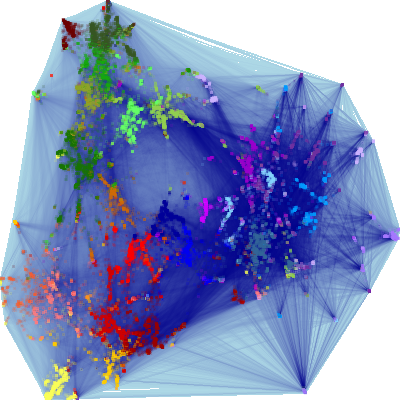
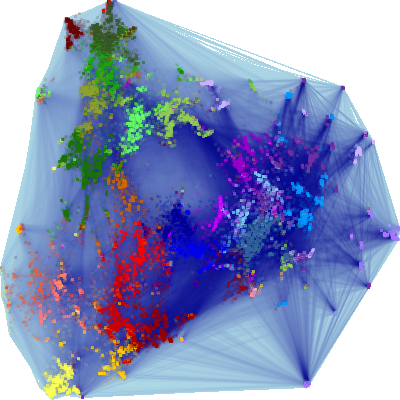

In [ ]:
fa2_d = graphplot(fa2, fa2_edges, "ForceAtlas2", cat="kmeans_label")
o_d = graphplot(node_df, o_edges, "Original", cat="kmeans_label")
o_b = graphplot(node_df, bundled_o_edges, "Original, bundled", cat="kmeans_label")
fa2_b = graphplot(node_df, bundled_fa2_edges, "Original, bundled", cat="kmeans_label")

tf.Images(o_d, fa2_d, o_b, fa2_b).cols(2)